In [ ]:
"""
    File : scatterCloneDiversityTumourSize.ipynb
    Plot : scatter plot of the number of clones with respect to tumour size in RCC tumours
    Input : 
        SourceData_Fig5b.xlsx
        SourceData_Fig5h.xlsx
"""

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
path_to_all_source_data = "../Source data for figures"

In [10]:
def plot_data(
    data_model,
    data_tumours
):
    def config_font_size(figsize):
        params = {'legend.fontsize': 6,
                  'figure.figsize': figsize,
                 'axes.labelsize': 8,
                 'axes.titlesize': 8,
                 'xtick.labelsize':6,
                 'ytick.labelsize':6,
                 'pdf.fonttype':42}
        plt.rcParams.update(params)
        
    macrodiv_plot = data_model.loc[data_model.SliceDiameter >= 20]
    colors = ["red", "blue"]
    customPalette = sns.set_palette(sns.color_palette(colors))
    
    buddings_colors = []
    for budding in data_tumours["Budding.structure"]:
        if budding == 'Absent':
            color = 'grey'
        elif budding == 'Present':
            color = 'orange'
        buddings_colors.append(color)
        
    fig = plt.figure(dpi=300)
    config_font_size(figsize = (2.75,3))

    jp = sns.kdeplot(
        data = macrodiv_plot,
        x = "SliceDiameter", y = "NumberSubclone",
        hue = "Condition",
        palette=customPalette,
        fill=False,
        levels = 1,
        thresh = 0.1
    )

    plt.scatter(
        x = data_tumours.Size, y = data_tumours.NumberSubclones,
        s = 2, c = buddings_colors
    )

    plt.xlabel('Size of primary tumour (mm)')
    plt.ylabel('Number of subclones')
    plt.legend().set_visible(False)

    plt.show()

# Figure 5h

In [5]:
path_to_excelfile_model = os.path.join(
    path_to_all_source_data,
    "Source_Data_Figure_5",
    "SourceData_Fig5b.xlsx"
)
excelfile = pd.ExcelFile(path_to_excelfile_model)
excelfile.sheet_names
data_model = pd.read_excel(
    excelfile, 
    sheet_name=excelfile.sheet_names[0]
)

In [6]:
path_to_excelfile_tumours = os.path.join(
    path_to_all_source_data,
    "Source_Data_Figure_5",
    "SourceData_Fig5h.xlsx"
)
excelfile = pd.ExcelFile(path_to_excelfile_tumours)
excelfile.sheet_names
data_tumours = pd.read_excel(
    excelfile, 
    sheet_name=excelfile.sheet_names[0]
)

No handles with labels found to put in legend.


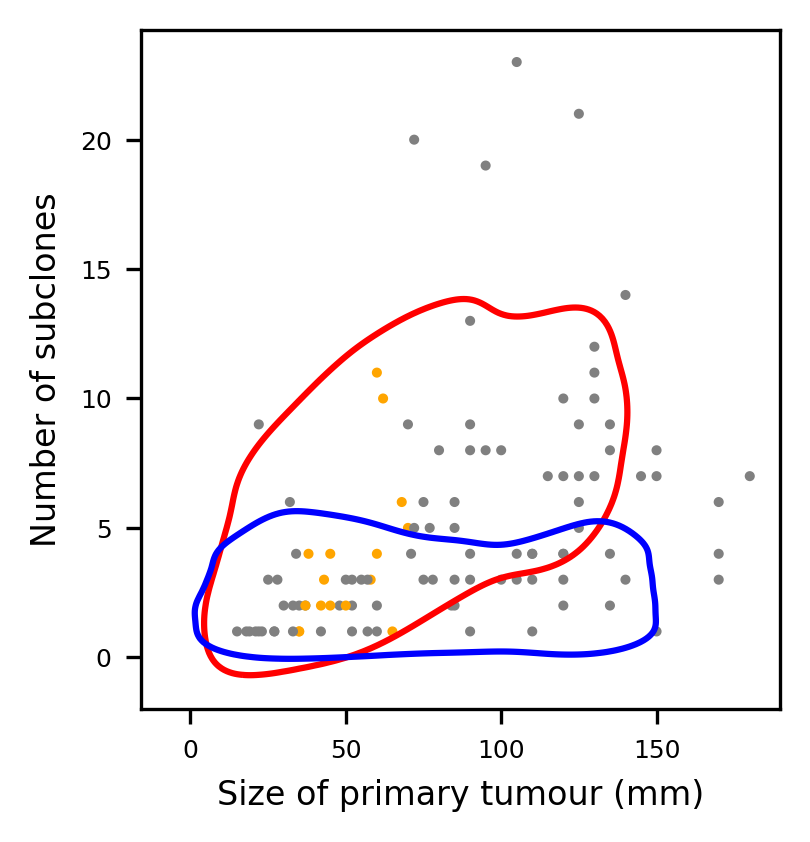

In [11]:
plot_data(
    data_model,
    data_tumours
)